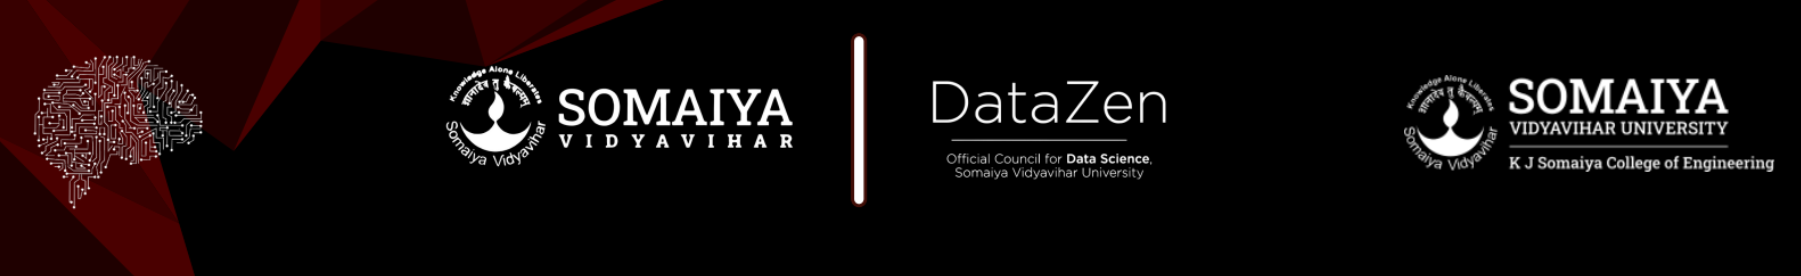

# **CASE STUDY (WITH CODING)**

###BY TEAM **IIT KHARGHAR**

   

###  1] Yash Shirsath
###  2] Yash Chaudhary

###  3] Sanika Sarang


   
   

# **TOPIC - FOOTBALL DATA DILEMMA (BILLION-POUND STRATEGY FOR SUCCESS..!)**

### **Problem Statement:-** Develop a comprehensive data-driven strategy for optimizing team performance in Fantasy Premier League (FPL) and make informed decisions on player selection, transfers, and budget allocation. This involves analyzing player statistics, ownership percentages, real-world performance metrics, and market values. The strategy should be iterative, adapting to changing FPL trends and player performances throughout the season. The goal is to achieve success in the FPL game by combining statistical insights with strategic decision-making.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# **1. Data Exploration**

In [2]:
fpl_data = pd.read_csv('/content/FPL_Data.csv', error_bad_lines=False)

<ipython-input-2-bbe326c968be>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('/content/FPL_Data.csv', error_bad_lines=False)
<ipython-input-2-bbe326c968be>:1: DtypeWarning: Columns (3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('/content/FPL_Data.csv', error_bad_lines=False)


In [3]:
transfermarkt_data = pd.read_csv('transfermarket_market_value.csv')

In [4]:
print("FPL Data:")
print(fpl_data.head())

FPL Data:
  season_x                name position team_x  assists  bonus  bps  \
0  2016-17     Aaron Cresswell      DEF    NaN        0      0    0   
1  2016-17        Aaron Lennon      MID    NaN        0      0    6   
2  2016-17        Aaron Ramsey      MID    NaN        0      0    5   
3  2016-17  Abdoulaye Doucouré      MID    NaN        0      0    0   
4  2016-17        Adam Forshaw      MID    NaN        0      0    3   

   clean_sheets  creativity  element  ...  team_h_score  threat  total_points  \
0             0         0.0      454  ...           2.0     0.0           0.0   
1             0         0.3      142  ...           1.0     0.0           1.0   
2             0         4.9       16  ...           3.0    23.0           2.0   
3             0         0.0      482  ...           1.0     0.0           0.0   
4             0         1.3      286  ...           1.0     0.0           1.0   

   transfers_balance  transfers_in transfers_out  value  was_home  \
0      

In [5]:
print(fpl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26523 entries, 0 to 26522
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           26523 non-null  object 
 1   name               26523 non-null  object 
 2   position           26523 non-null  object 
 3   team_x             6671 non-null   object 
 4   assists            26523 non-null  int64  
 5   bonus              26523 non-null  int64  
 6   bps                26523 non-null  int64  
 7   clean_sheets       26523 non-null  int64  
 8   creativity         26523 non-null  float64
 9   element            26523 non-null  int64  
 10  fixture            26523 non-null  int64  
 11  goals_conceded     26523 non-null  int64  
 12  goals_scored       26523 non-null  int64  
 13  ict_index          26523 non-null  float64
 14  influence          26523 non-null  float64
 15  kickoff_time       26523 non-null  object 
 16  minutes            265

In [6]:
print(fpl_data.describe())

            assists         bonus           bps  clean_sheets    creativity  \
count  26523.000000  26523.000000  26523.000000  26523.000000  26523.000000   
mean       0.056027      0.145609      8.109905      0.141952      6.329902   
std        0.251288      0.565039     11.038160      0.349008     12.230661   
min        0.000000      0.000000    -18.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      3.000000      0.000000      0.000000   
75%        0.000000      0.000000     14.000000      0.000000      7.400000   
max        4.000000      3.000000    114.000000      1.000000    170.900000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  26523.000000  26523.000000    26523.000000  26523.000000  26523.000000   
mean     287.272820    161.473966        0.618557      0.061758      2.311790   
std      172.439039    112.751644        1.05

In [7]:
print("\nTransfermarkt Data:")
print(transfermarkt_data.head(10))


Transfermarkt Data:
               Player            Position  Market Value
0      Erling Haaland      Centre-Forward           180
1         Bukayo Saka        Right Winger           120
2         Declan Rice  Defensive Midfield           110
3               Rodri  Defensive Midfield           110
4          Phil Foden        Right Winger           110
5      Moisés Caicedo  Defensive Midfield            90
6      Julián Álvarez      Second Striker            90
7     Martin Ødegaard  Attacking Midfield            90
8     Bruno Guimarães  Defensive Midfield            85
9  Gabriel Martinelli         Left Winger            85


In [8]:
print(transfermarkt_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        100 non-null    object
 1   Position      100 non-null    object
 2   Market Value  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB
None


In [9]:
print(transfermarkt_data.describe())

       Market Value
count    100.000000
mean      56.880000
std       22.831522
min       35.000000
25%       40.000000
50%       50.000000
75%       66.250000
max      180.000000


In [10]:
print(fpl_data.columns)

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [11]:
understat_data = pd.read_csv('understat.csv')

In [12]:
print(understat_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4088 non-null   int64  
 1   minute           4088 non-null   int64  
 2   result           4088 non-null   object 
 3   X                4088 non-null   float64
 4   Y                4088 non-null   float64
 5   xG               4088 non-null   float64
 6   player           4088 non-null   object 
 7   h_a              4088 non-null   object 
 8   player_id        4088 non-null   int64  
 9   situation        4088 non-null   object 
 10  season           4088 non-null   int64  
 11  shotType         4088 non-null   object 
 12  match_id         4088 non-null   int64  
 13  h_team           4088 non-null   object 
 14  a_team           4088 non-null   object 
 15  h_goals          4088 non-null   int64  
 16  a_goals          4088 non-null   int64  
 17  date          

In [13]:
print(understat_data.describe())

                  id       minute            X            Y           xG  \
count    4088.000000  4088.000000  4088.000000  4088.000000  4088.000000   
mean   436884.979452    48.416830     0.850205     0.504296     0.110573   
std      6919.838832    26.449992     0.086446     0.123129     0.161434   
min    425563.000000     0.000000     0.017000     0.034000     0.000000   
25%    430583.750000    26.000000     0.793000     0.421000     0.026222   
50%    436659.500000    49.000000     0.865000     0.501000     0.052914   
75%    442778.250000    71.000000     0.910000     0.588000     0.096253   
max    448524.000000    99.000000     0.995000     0.978000     0.973964   

          player_id  season      match_id      h_goals      a_goals  
count   4088.000000  4088.0   4088.000000  4088.000000  4088.000000  
mean    4090.615949  2021.0  16453.624755     1.555773     1.285959  
std     3201.239893     0.0     45.946460     1.331635     1.200961  
min       62.000000  2021.0  16376.

In [14]:
print("\nMissing Values:")
print(understat_data.isnull().sum())


Missing Values:
id                    0
minute                0
result                0
X                     0
Y                     0
xG                    0
player                0
h_a                   0
player_id             0
situation             0
season                0
shotType              0
match_id              0
h_team                0
a_team                0
h_goals               0
a_goals               0
date                  0
player_assisted    1091
lastAction            0
dtype: int64


In [15]:
top_scorers = understat_data.groupby('player')['h_goals'].sum().sort_values(ascending=False).head(10)
print("\nTop Scorers:")
print(top_scorers)


Top Scorers:
player
Mohamed Salah          99
Cristiano Ronaldo      83
Diogo Jota             75
Jamie Vardy            73
Bruno Fernandes        72
Michail Antonio        72
Allan Saint-Maximin    71
Conor Gallagher        69
Sadio Mané             69
Raphinha               67
Name: h_goals, dtype: int64


In [16]:
top_scorers = understat_data.groupby('player')['a_goals'].sum().sort_values(ascending=False).head(10)
print("\nTop Scorers:")
print(top_scorers)


Top Scorers:
player
Mohamed Salah        132
Sadio Mané            97
Cristiano Ronaldo     78
Michail Antonio       71
Jarrod Bowen          70
Joshua King           59
Raphinha              55
Jamie Vardy           55
Said Benrahma         55
Ismaila Sarr          54
Name: a_goals, dtype: int64


# **1. Exploring Basic FPL Data**

In [17]:
# Top players with their relevant Metrics
selected_metrics = ['name', 'total_points', 'selected', 'GW']
selected_data = fpl_data[selected_metrics]
top_players_data = selected_data.sort_values(by='total_points', ascending=False)
top_players_matrix = top_players_data.head(10)
print(top_players_matrix)

                   name  total_points   selected    GW
15718     Mohamed Salah          29.0  3662419.0  31.0
20476     Heung-Min Son          24.0  1378891.0   2.0
6809         Harry Kane          24.0   896201.0  37.0
21591     Jack Grealish          24.0   665271.0   4.0
3714      Romelu Lukaku          21.0  1170726.0  24.0
24979      Riyad Mahrez          21.0   178758.0  10.0
2974      Marcos Alonso          21.0   364135.0  21.0
8254   Junior Stanislas          21.0     6991.0   8.0
20469        Harry Kane          21.0   829125.0   2.0
14412     Sergio Agüero          21.0  1681474.0  27.0


Name: Player's Name

Total Points: Total Fantasy Primier League Points Earned

Selected: Number of FPL managers who have selected the player

GW: GameWeek

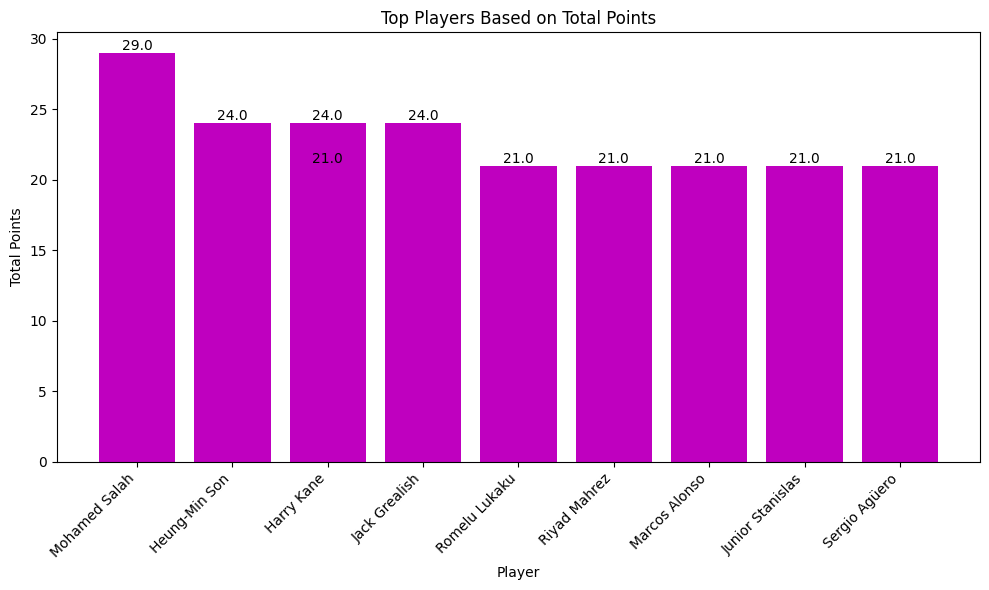

In [18]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_players_matrix['name'], top_players_matrix['total_points'], color='m')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.title('Top Players Based on Total Points')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# **2. Identify Popular Players**

In [19]:
sample_data = fpl_data.sample(frac=0.1)  # Adjust the fraction as needed
selected_metrics = ['name', 'total_points', 'selected', 'GW']
selected_data = sample_data[selected_metrics]

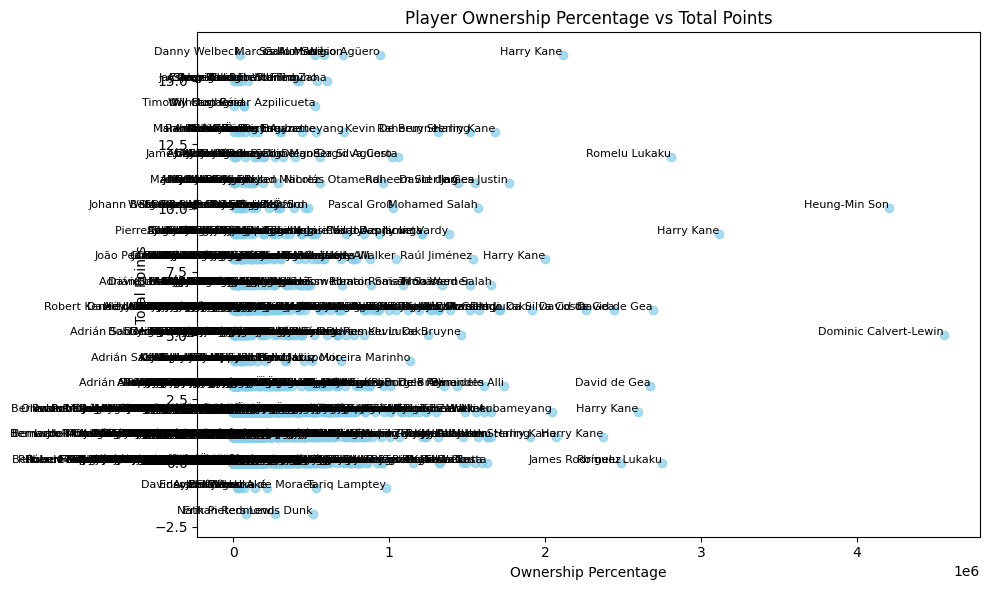

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['selected'], selected_data['total_points'], color='skyblue', alpha=0.7)
plt.xlabel('Ownership Percentage')
plt.ylabel('Total Points')
plt.title('Player Ownership Percentage vs Total Points')

for i, txt in enumerate(selected_data['name']):
    plt.annotate(txt, (selected_data['selected'].iloc[i], selected_data['total_points'].iloc[i]), fontsize=8, ha='right')

plt.tight_layout()

plt.show()

In [21]:
# Consider whether the popularity of a player in FPL aligns with their performance on the pitch.

sample_data = fpl_data.sample(frac=0.1)  # Adjust the fraction as needed
selected_metrics = ['name', 'total_points', 'selected', 'position', 'GW']
selected_data = sample_data[selected_metrics]

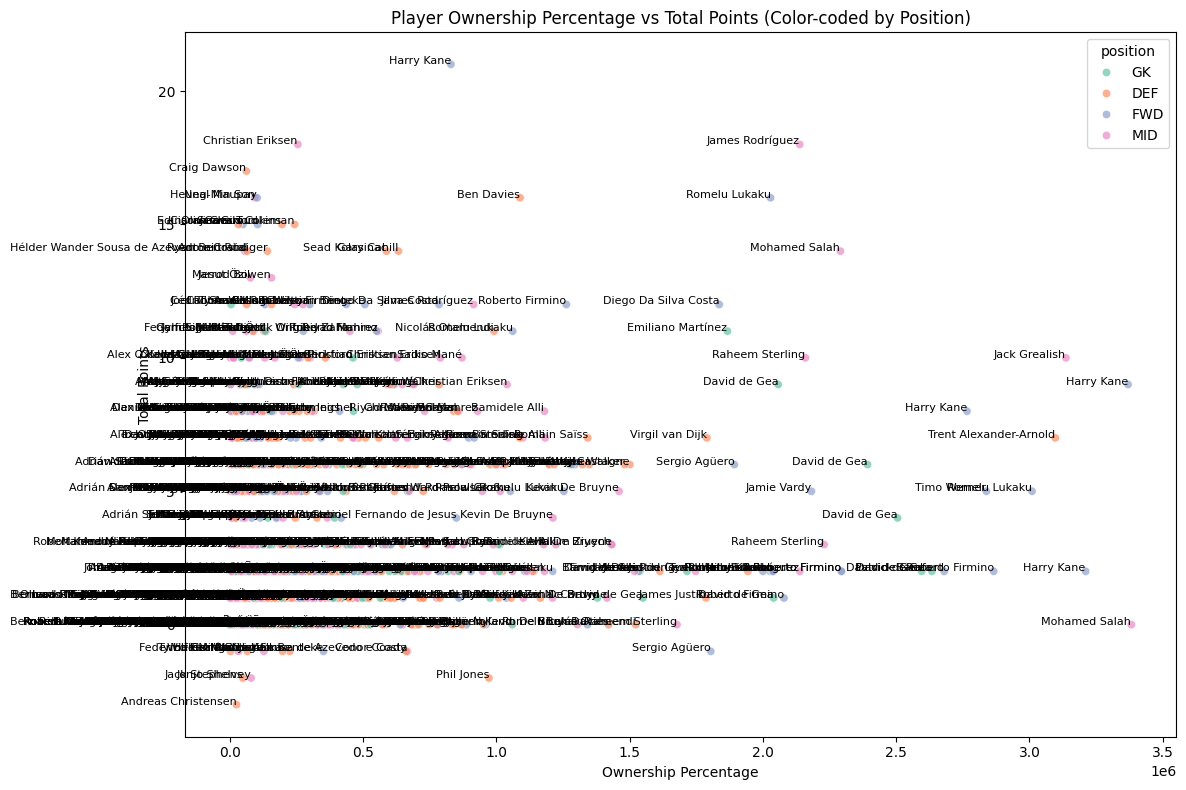

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='selected', y='total_points', hue='position', data=selected_data, palette='Set2', alpha=0.7)
plt.xlabel('Ownership Percentage')
plt.ylabel('Total Points')
plt.title('Player Ownership Percentage vs Total Points (Color-coded by Position)')

for i, txt in enumerate(selected_data['name']):
    plt.annotate(txt, (selected_data['selected'].iloc[i], selected_data['total_points'].iloc[i]), fontsize=8, ha='right')

plt.tight_layout()
plt.show()

# **3. Assess Player Form**

In [23]:
# - Evaluate FPL points earned by players in recent matches to gauge their current form.

selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]

In [24]:
top_positions = ['FWD', 'MID']
filtered_data = selected_data[selected_data['position'].isin(top_positions)]
recent_gameweeks = 5
recent_data = filtered_data[filtered_data['GW'] > filtered_data['GW'].max() - recent_gameweeks]

<ipython-input-25-683c4e7aff7a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='position', y='total_points', data=recent_data, ci=None, palette='viridis')
<ipython-input-25-683c4e7aff7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='position', y='total_points', data=recent_data, ci=None, palette='viridis')


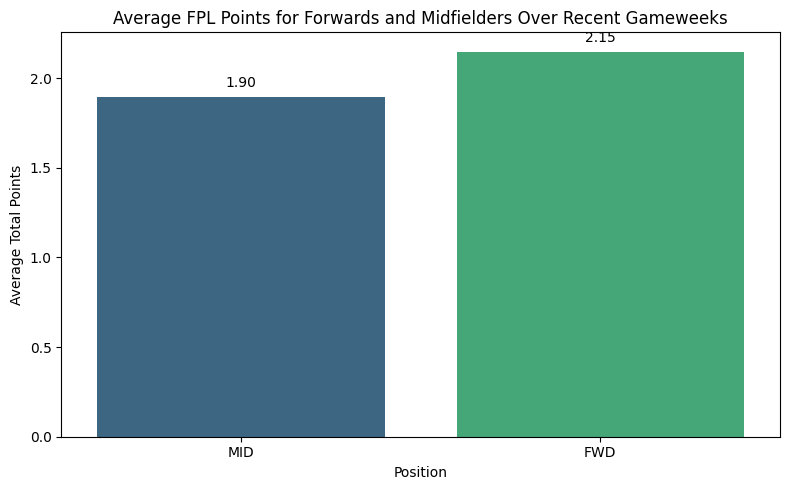

In [25]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='position', y='total_points', data=recent_data, ci=None, palette='viridis')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.title('Average FPL Points for Forwards and Midfielders Over Recent Gameweeks')

for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.tight_layout()
plt.show()

In [26]:
selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]
recent_gameweeks = 5
recent_data = selected_data[selected_data['GW'] > selected_data['GW'].max() - recent_gameweeks]

<ipython-input-27-850e79d00e59>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


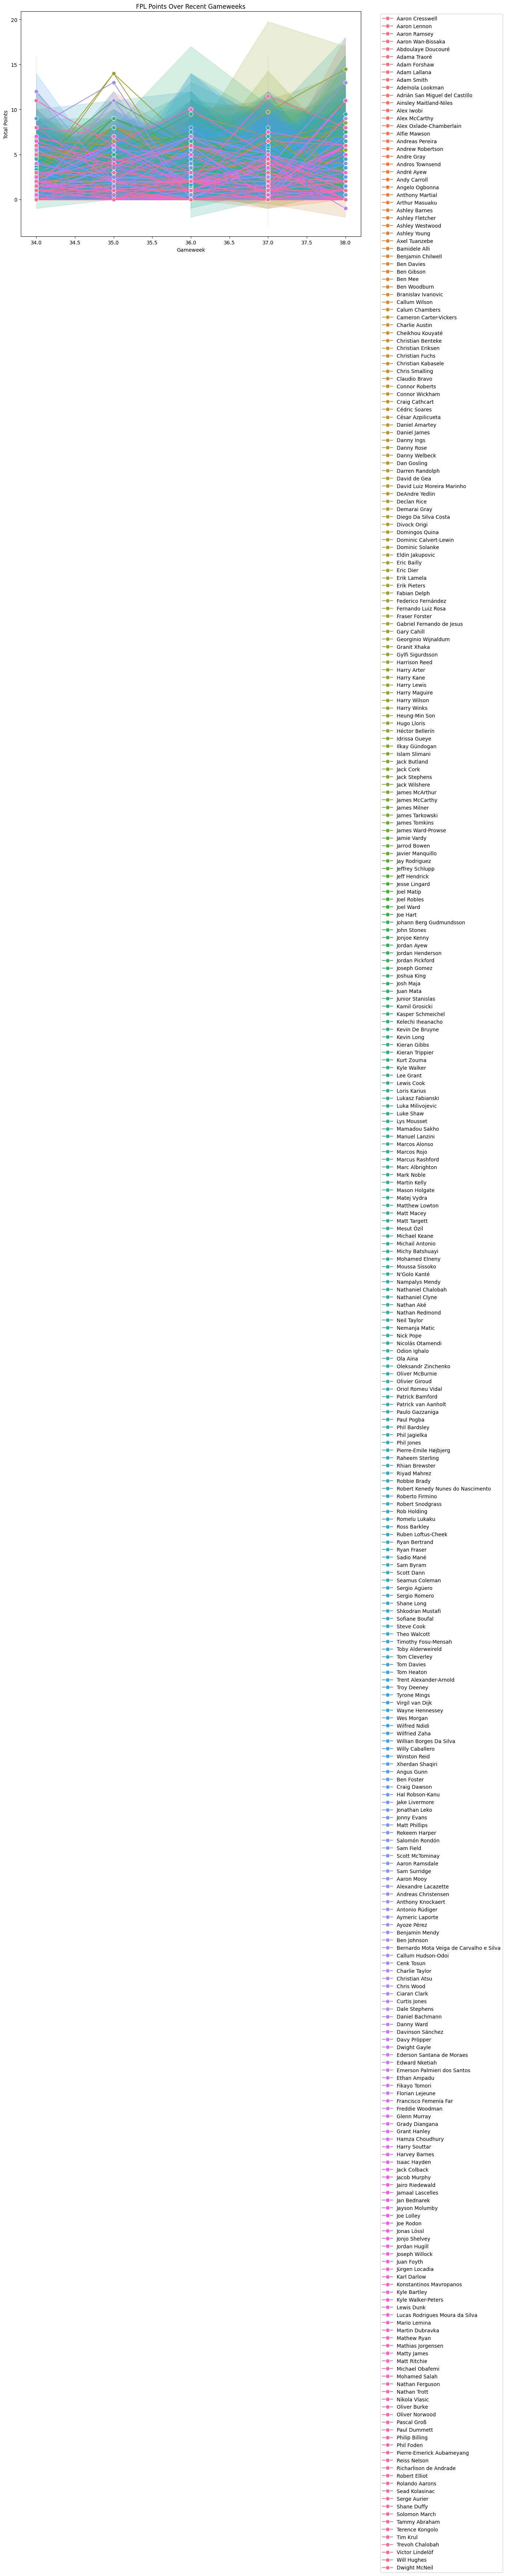

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='GW', y='total_points', hue='name', data=recent_data, marker='o', markersize=8)
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('FPL Points Over Recent Gameweeks')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

In [28]:
#  Identify players who have been consistently performing well in the fantasy game.

selected_metrics = ['name', 'total_points', 'position', 'GW']
selected_data = fpl_data[selected_metrics]
average_points = selected_data.groupby('name')['total_points'].mean().reset_index()
top_players = average_points.sort_values(by='total_points', ascending=False)
top_n_players = 10
filtered_players = top_players.head(top_n_players)

<ipython-input-29-1d1c7911ba65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='total_points', data=filtered_players, palette='viridis')


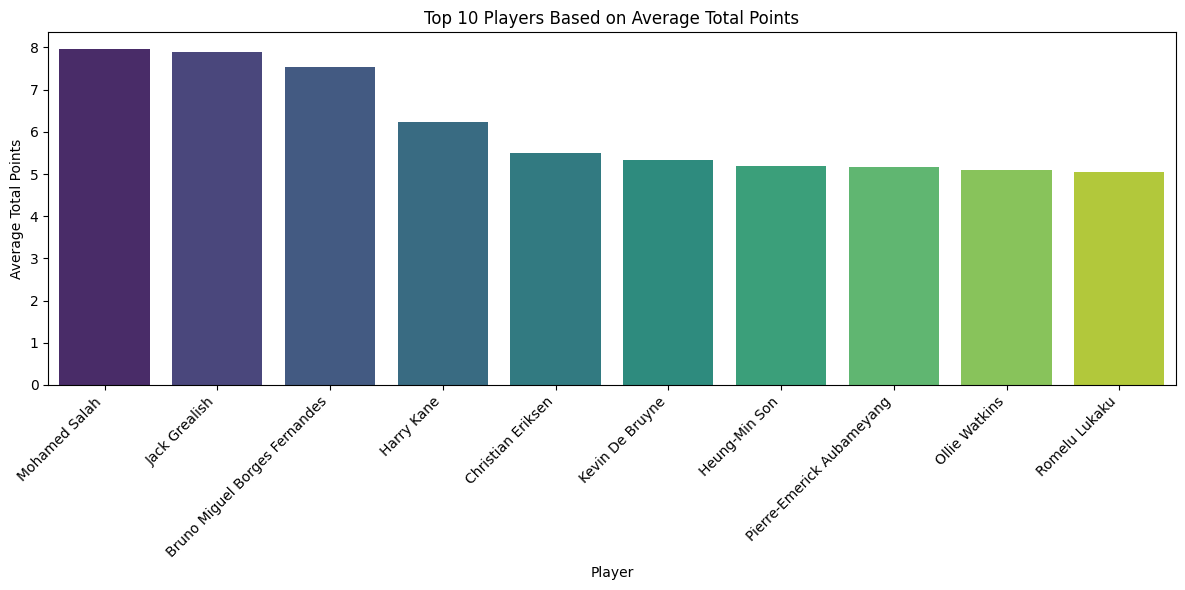

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='total_points', data=filtered_players, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Average Total Points')
plt.title(f'Top {top_n_players} Players Based on Average Total Points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **4. Correlate FPL Performance with Real-World Performance**


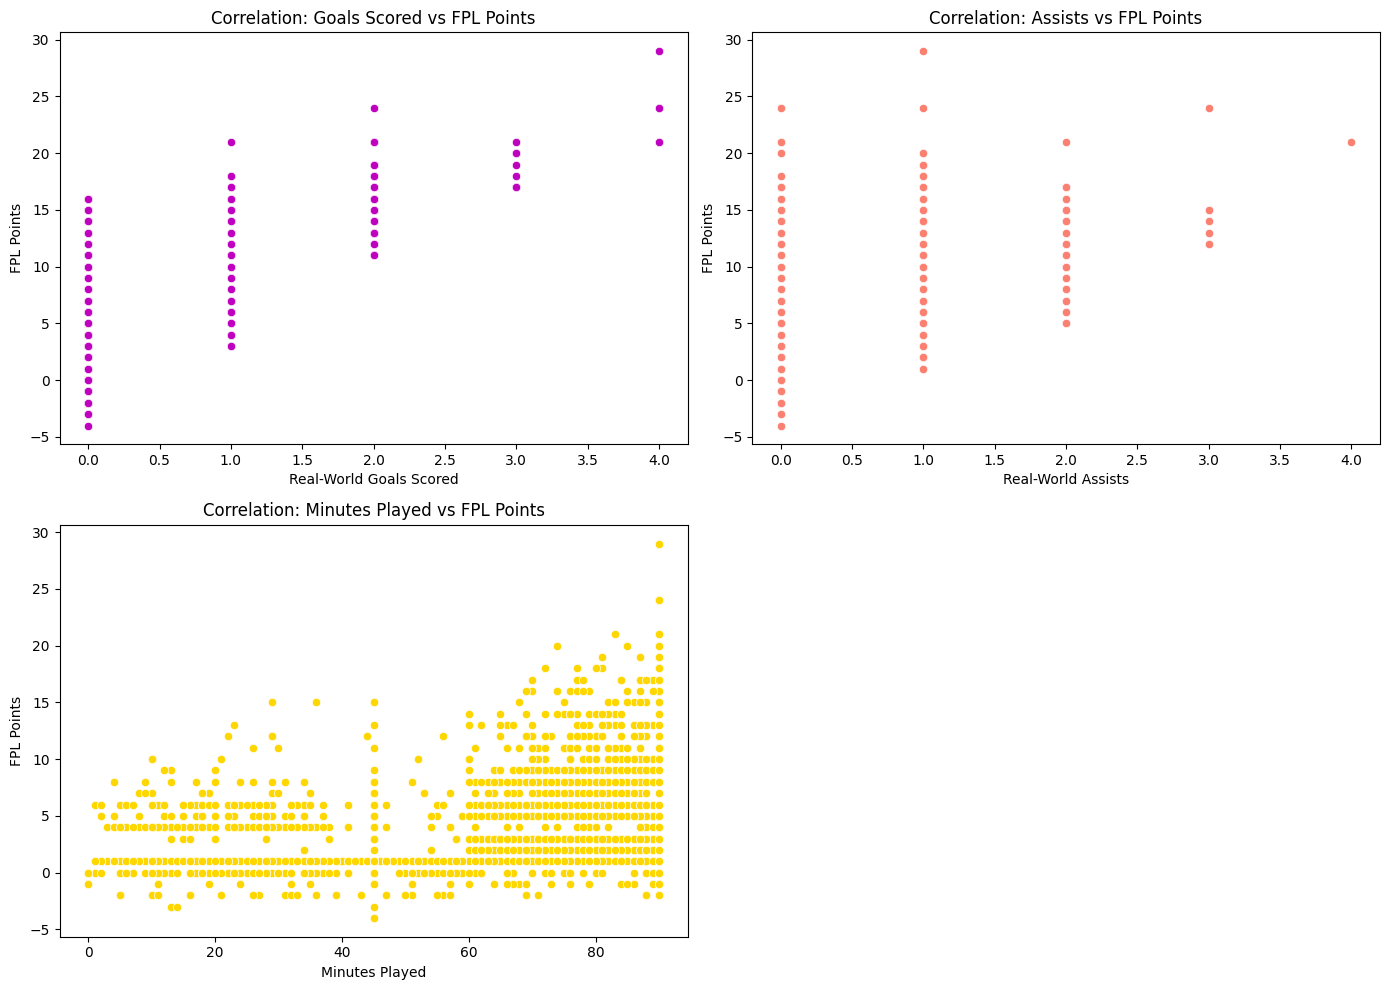

In [30]:
selected_metrics = ['name', 'total_points', 'goals_scored', 'assists', 'minutes']
performance_data = fpl_data[selected_metrics]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='goals_scored', y='total_points', data=performance_data, ax=axes[0, 0], color='m')

axes[0, 0].set_xlabel('Real-World Goals Scored')
axes[0, 0].set_ylabel('FPL Points')
axes[0, 0].set_title('Correlation: Goals Scored vs FPL Points')

sns.scatterplot(x='assists', y='total_points', data=performance_data, ax=axes[0, 1], color='salmon')
axes[0, 1].set_xlabel('Real-World Assists')
axes[0, 1].set_ylabel('FPL Points')
axes[0, 1].set_title('Correlation: Assists vs FPL Points')

sns.scatterplot(x='minutes', y='total_points', data=performance_data, ax=axes[1, 0], color='gold')
axes[1, 0].set_xlabel('Minutes Played')
axes[1, 0].set_ylabel('FPL Points')
axes[1, 0].set_title('Correlation: Minutes Played vs FPL Points')

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

In [31]:
correlation_goals = performance_data['total_points'].corr(performance_data['goals_scored'])
correlation_assists = performance_data['total_points'].corr(performance_data['assists'])
correlation_minutes = performance_data['total_points'].corr(performance_data['minutes'])

In [32]:
print(f"Pearson Correlation Coefficient (Goals): {correlation_goals}")
print(f"Pearson Correlation Coefficient (Assists): {correlation_assists}")
print(f"Pearson Correlation Coefficient (Minutes): {correlation_minutes}")

Pearson Correlation Coefficient (Goals): 0.6723384249614205
Pearson Correlation Coefficient (Assists): 0.455750218673431
Pearson Correlation Coefficient (Minutes): 0.6060898716812055


In [33]:
print(f"Pearson Correlation Coefficient (Goals): {correlation_goals*100}")
print(f"Pearson Correlation Coefficient (Assists): {correlation_assists*100}")
print(f"Pearson Correlation Coefficient (Minutes): {correlation_minutes*100}")

Pearson Correlation Coefficient (Goals): 67.23384249614205
Pearson Correlation Coefficient (Assists): 45.575021867343104
Pearson Correlation Coefficient (Minutes): 60.60898716812056


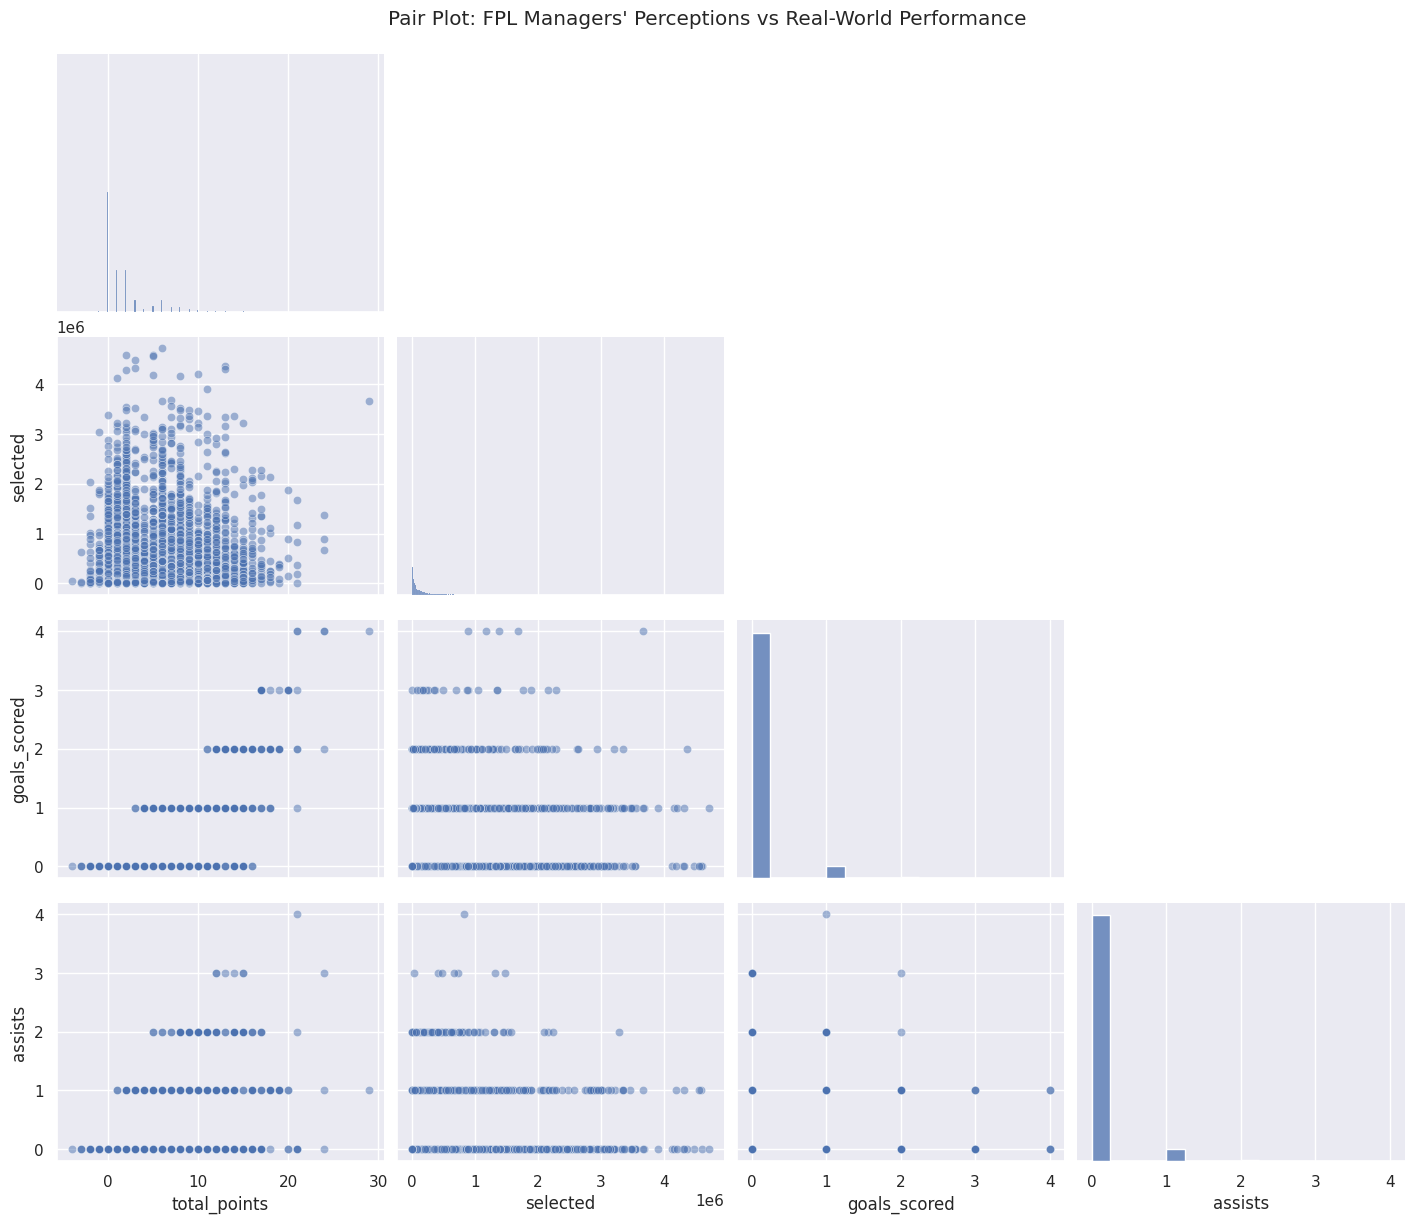

In [34]:
# Consider how FPL managers' perceptions might influence real-world transfer activities

selected_metrics = ['total_points', 'selected', 'goals_scored', 'assists']
transfer_influence_data = fpl_data[selected_metrics]
sns.set(style="darkgrid")
sns.pairplot(transfer_influence_data, height=3, aspect=1.2, markers='o', plot_kws={'alpha': 0.5}, corner=True)

plt.suptitle('Pair Plot: FPL Managers\' Perceptions vs Real-World Performance', y=1.02)
plt.show()

# **5. Budget Allocation**

Basic PS:- Participants have to create a transfer strategy to
strategically sell/acquire players for Chelsea FC's squad
revamp.
They have to identify squad weaknesses, propose specific
acquisitions within set rules, and use data-driven insights
for a comprehensive transfer strategy. The objective is to
enhance competitiveness and address strategic priorities
through well-informed player selections.

In [35]:
# Factor in FPL prices and ownership when allocating budgets for player acquisitions.

total_budget = 150
min_players_to_buy = 3
max_players_to_buy = 8

In [37]:
player_data = pd.read_csv('/content/players.csv')

In [38]:
def allocate_budget(data, total_budget, min_players, max_players):
    required_columns = ['Market Value', 'Position']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget
    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)
except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
       Player/Position            Position  Market Value  Budget Allocation
19      Moisés Caicedo  Defensive Midfield      0.094927          14.239004
6       Enzo Fernández    Central Midfield      0.084379          12.656893
14  Christopher Nkunku  Attacking Midfield      0.079106          11.865837
20        Levi Colwill         Centre-Back      0.058011           8.701614
18         Reece James          Right-Back      0.052737           7.910558
29         Roméo Lavia  Defensive Midfield      0.052737           7.910558
5      Raheem Sterling         Left Winger      0.047463           7.119502
15         Cole Palmer  Attacking Midfield      0.047463           7.119502


In [39]:
# Suggested Changes

compulsory_replacement_player = 'STRIKER'
compulsory_signing_position = 'MIDFIELDER'
min_market_value_for_signing = 65
net_spend_limit = 150

In [40]:
exclude_players = ['Moisés Caicedo', 'Enzo Fernández']

def allocate_budget(data, total_budget, min_players, max_players, compulsory_replacement, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players):
    # Check if the expected columns are present in the dataset
    required_columns = ['Market Value', 'Position', 'Player/Position']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")

    data = data[~data['Player/Position'].isin(exclude_players)]
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget

    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')
    selected_players.loc[selected_players['Position'] == compulsory_replacement, 'Player/Position'] = 'NICOLAS JACKSON'
    compulsory_signing_candidates = data[data['Position'] == compulsory_signing_position]

    if not compulsory_signing_candidates.empty:
        compulsory_signing = compulsory_signing_candidates[compulsory_signing_candidates['Market Value'] >= min_market_value_for_signing].nlargest(1, 'Market Value').iloc[0]
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Player/Position'] = compulsory_signing['Player/Position']
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Market Value'] = compulsory_signing['Market Value']

    total_spend = selected_players['Market Value'].sum()
    net_spend = total_spend - total_budget
    if net_spend > net_spend_limit:
        reduction_factor = net_spend_limit / net_spend
        selected_players['Budget Allocation'] *= reduction_factor

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy, compulsory_replacement_player, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)

except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
       Player/Position            Position  Market Value  Budget Allocation
14  Christopher Nkunku  Attacking Midfield      0.096389          14.458296
20        Levi Colwill         Centre-Back      0.070685          10.602750
18         Reece James          Right-Back      0.064259           9.638864
29         Roméo Lavia  Defensive Midfield      0.064259           9.638864
5      Raheem Sterling         Left Winger      0.057833           8.674978
15         Cole Palmer  Attacking Midfield      0.057833           8.674978
1          Axel Disasi         Centre-Back      0.053978           8.096646
17     Conor Gallagher    Central Midfield      0.053978           8.096646


<ipython-input-40-c98f1c0903d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
<ipython-input-40-c98f1c0903d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Budget Allocation'] = data['Market Value'] * total_budget
<ipython-input-40-c98f1c0903d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

# 6. **Consider FPL Trends:**

In [41]:
# Look for trends in FPL manager behavior, such as mass transfers in or out of certain players.

fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)

<ipython-input-41-85afd229b429>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
<ipython-input-41-85afd229b429>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


<ipython-input-42-8ada1c299d43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='selected', y='name', data=sorted_ownership.head(10), palette='viridis')


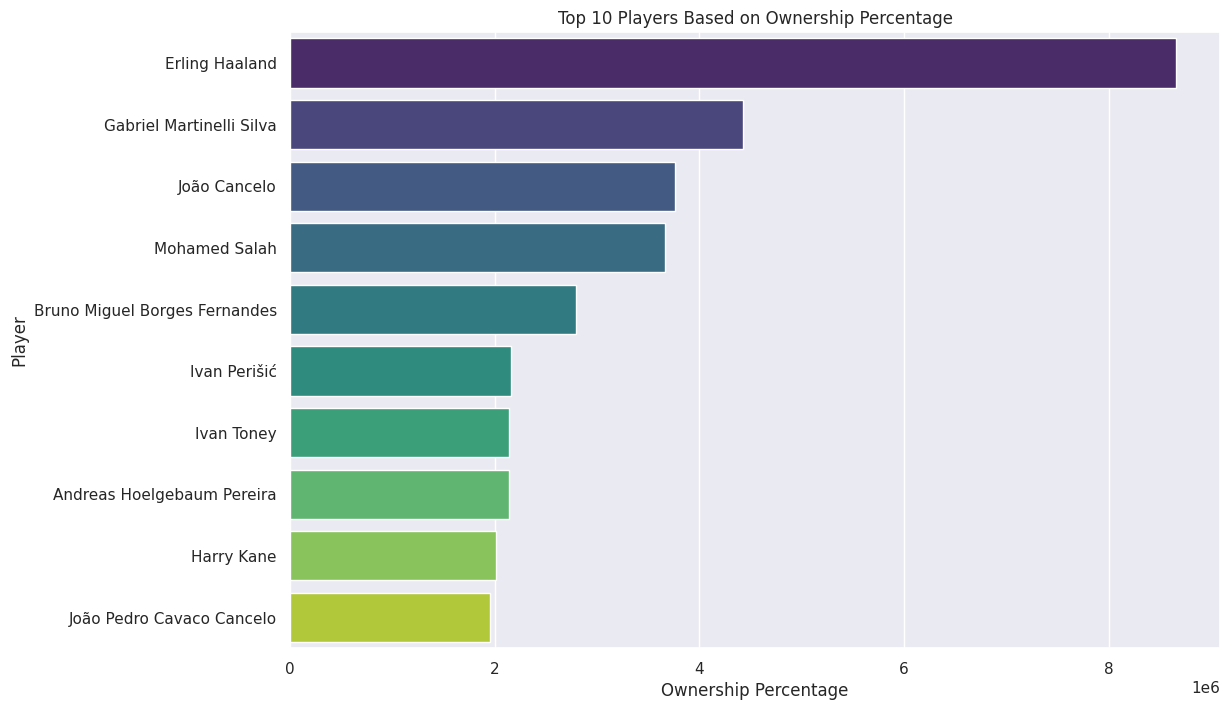

In [42]:
average_ownership = fpl_data.groupby('name')['selected'].mean().reset_index()
sorted_ownership = average_ownership.sort_values(by='selected', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='selected', y='name', data=sorted_ownership.head(10), palette='viridis')
plt.xlabel('Ownership Percentage')
plt.ylabel('Player')
plt.title('Top 10 Players Based on Ownership Percentage')
plt.show()

In [46]:
# Understand if these trends can provide insights into potential market movements.

transfer_data = pd.read_csv('/content/players.csv')

print("Columns in FPL Data:")
print(fpl_data.columns)
print("\nColumns in Transfer Data:")
print(transfer_data.columns)
player_identifier = 'Player/Position'

Columns in FPL Data:
Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

Columns in Transfer Data:
Index(['Player/Position', 'Position', 'Market Value'], dtype='object')


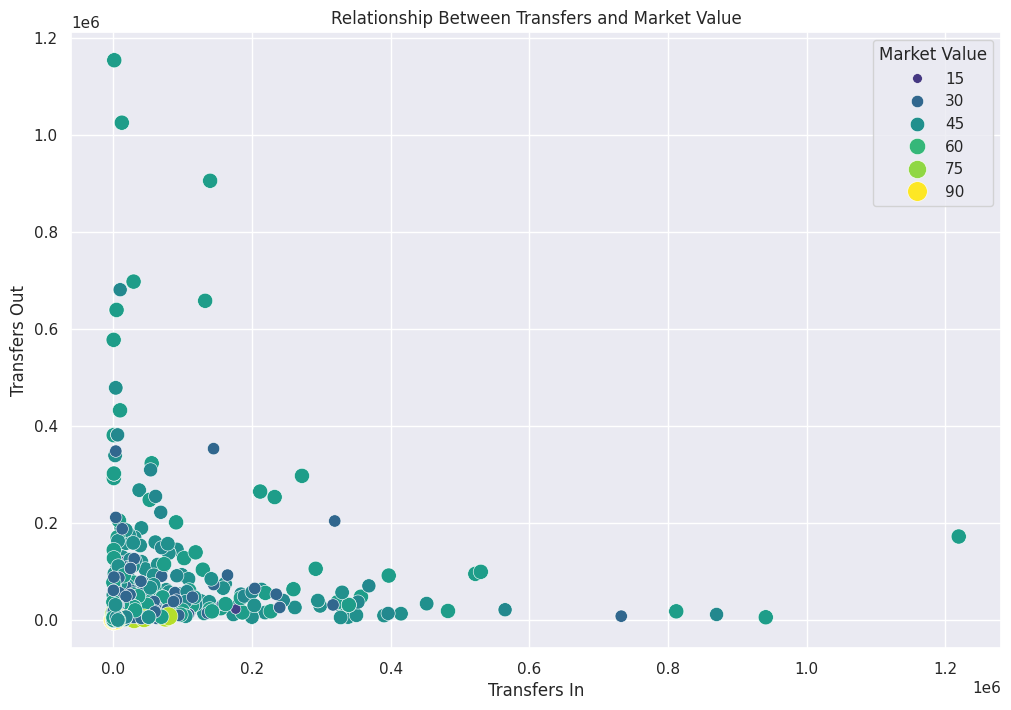

In [47]:
merged_data = pd.merge(fpl_data, transfer_data, how='left', left_on='name', right_on=player_identifier)
merged_data = merged_data.dropna(subset=['transfers_in', 'transfers_out'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='transfers_in', y='transfers_out', hue='Market Value', size='Market Value', data=merged_data, palette='viridis', sizes=(20, 200))
plt.xlabel('Transfers In')
plt.ylabel('Transfers Out')
plt.title('Relationship Between Transfers and Market Value')
plt.show()

# 7. **Integration with Transfermarkt and Understat Data**

In [50]:
# Integrate FPL data with information from Transfermarkt and Understat for a comprehensive analysis.

fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
transfermarkt_data = pd.read_csv('/content/players.csv')
marketvalue_data = pd.read_csv('/content/transfermarket_market_value.csv')

<ipython-input-50-7024a62d98de>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
<ipython-input-50-7024a62d98de>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


In [51]:
print("FPL Columns:", fpl_data.columns)
print("Transfermarkt Columns:", transfermarkt_data.columns)
print("MarketValue Columns:", marketvalue_data.columns)

FPL Columns: Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')
Transfermarkt Columns: Index(['Player/Position', 'Position', 'Market Value'], dtype='object')
MarketValue Columns: Index(['Player', 'Position', 'Market Value'], dtype='object')


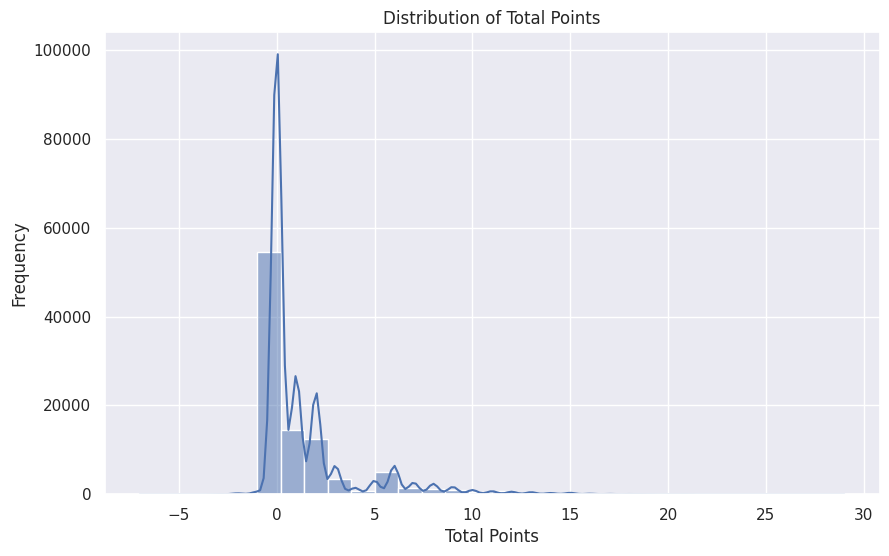

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['total_points'], bins=30, kde=True)
plt.title('Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

<ipython-input-53-1fe78d602391>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


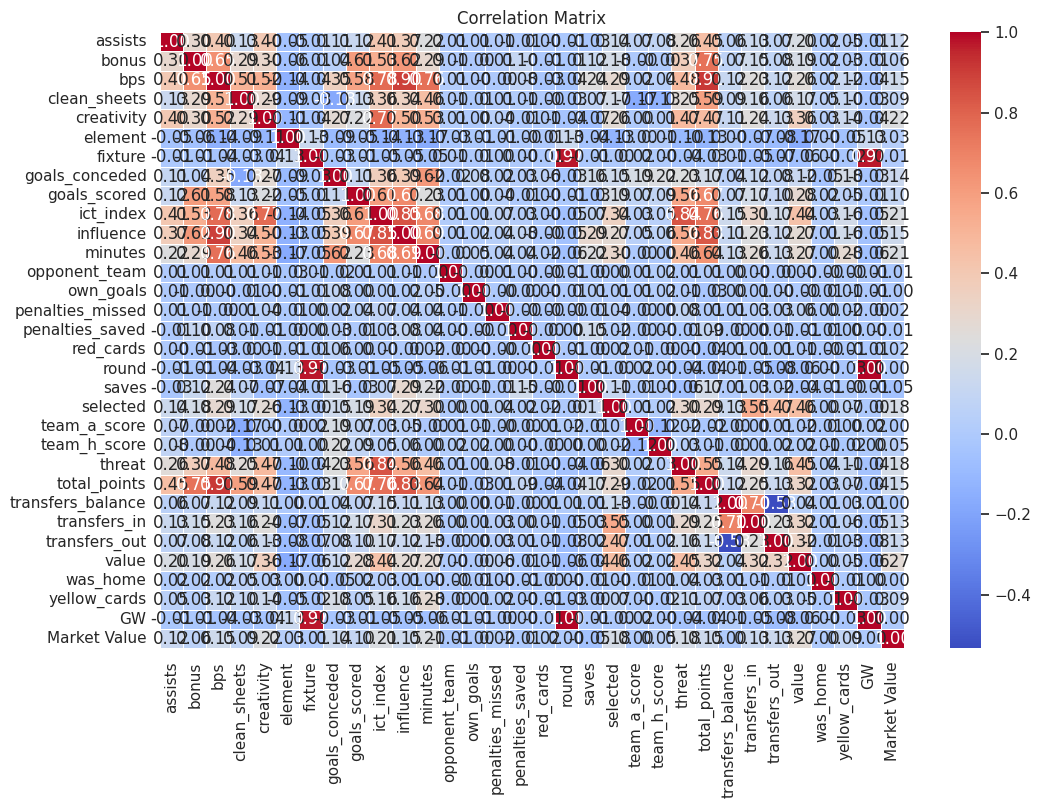

In [53]:
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [54]:
merged_fpl_marketvalue = pd.merge(fpl_data, marketvalue_data, how='left', left_on='name', right_on='Player')
print(merged_fpl_marketvalue)

      season_x                      name position       team_x  assists  \
0      2016-17           Aaron Cresswell      DEF          NaN        0   
1      2016-17              Aaron Lennon      MID          NaN        0   
2      2016-17              Aaron Ramsey      MID          NaN        0   
3      2016-17        Abdoulaye Doucouré      MID          NaN        0   
4      2016-17              Adam Forshaw      MID          NaN        0   
...        ...                       ...      ...          ...      ...   
96164  2022-23              Oliver Skipp      MID        Spurs        0   
96165  2022-23            Ryan Sessegnon      DEF        Spurs        0   
96166  2022-23              Ashley Young      DEF  Aston Villa        0   
96167  2022-23  Jeremy Sarmiento Morante      MID     Brighton        0   
96168  2022-23            Philip Billing      MID  Bournemouth        0   

       bonus  bps  clean_sheets  creativity  element  ...  transfers_balance  \
0          0    0  

In [55]:
top_10_players = marketvalue_data.nlargest(10, 'Market Value')
print(top_10_players)

               Player            Position  Market Value
0      Erling Haaland      Centre-Forward           180
1         Bukayo Saka        Right Winger           120
2         Declan Rice  Defensive Midfield           110
3               Rodri  Defensive Midfield           110
4          Phil Foden        Right Winger           110
5      Moisés Caicedo  Defensive Midfield            90
6      Julián Álvarez      Second Striker            90
7     Martin Ødegaard  Attacking Midfield            90
8     Bruno Guimarães  Defensive Midfield            85
9  Gabriel Martinelli         Left Winger            85


# **5. Budget Allocation Again**

MINIMUM PLAYERS TO BUY: 3

MAXIMUM PLAYERS TO BUY: 8

COMPULSORY REPLACEMENT: STRIKER FOR NICOLAS JACKSON

COMPULSORY SIGNING: STAR MIDFIELDER

(MINIMUM MARKET VALUE: £65 MILLION)

NETSPEND (BUY/SELL): £150 MILLION

In [56]:
total_budget = 150
min_players_to_buy = 3
max_players_to_buy = 8
player_data = pd.read_csv('/content/transfermarket_market_value.csv')

def allocate_budget(data, total_budget, min_players, max_players, compulsory_replacement, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players):
    # Check if the expected columns are present in the dataset
    required_columns = ['Market Value', 'Position', 'Player']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"Columns {required_columns} not found in the dataset.")

    data = data[~data['Player'].isin(exclude_players)]
    data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
    data['Budget Allocation'] = data['Market Value'] * total_budget

    data['Budget Allocation'] = data['Budget Allocation'].clip(lower=0)
    num_players_to_buy = max(min_players, min(max_players, len(data)))
    selected_players = data.nlargest(num_players_to_buy, 'Budget Allocation')
    selected_players.loc[selected_players['Position'] == compulsory_replacement, 'Player'] = 'NICOLAS JACKSON'
    compulsory_signing_candidates = data[data['Position'] == compulsory_signing_position]

    if not compulsory_signing_candidates.empty:
        compulsory_signing = compulsory_signing_candidates[compulsory_signing_candidates['Market Value'] >= min_market_value_for_signing].nlargest(1, 'Market Value').iloc[0]
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Player'] = compulsory_signing['Player']
        selected_players.loc[selected_players['Position'] == compulsory_signing_position, 'Market Value'] = compulsory_signing['Market Value']

    total_spend = selected_players['Market Value'].sum()
    net_spend = total_spend - total_budget
    if net_spend > net_spend_limit:
        reduction_factor = net_spend_limit / net_spend
        selected_players['Budget Allocation'] *= reduction_factor

    return selected_players

try:
    selected_players = allocate_budget(player_data, total_budget, min_players_to_buy, max_players_to_buy, compulsory_replacement_player, compulsory_signing_position, min_market_value_for_signing, net_spend_limit, exclude_players)
    print("\nSelected Players with Budget Allocation:")
    print(selected_players)

except ValueError as e:
    print(e)


Selected Players with Budget Allocation:
            Player            Position  Market Value  Budget Allocation
0   Erling Haaland      Centre-Forward      0.032621           4.893077
1      Bukayo Saka        Right Winger      0.021747           3.262051
2      Declan Rice  Defensive Midfield      0.019935           2.990214
3            Rodri  Defensive Midfield      0.019935           2.990214
4       Phil Foden        Right Winger      0.019935           2.990214
6   Julián Álvarez      Second Striker      0.016310           2.446539
7  Martin Ødegaard  Attacking Midfield      0.016310           2.446539
8  Bruno Guimarães  Defensive Midfield      0.015404           2.310620


<ipython-input-56-d941e3deacfa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Market Value'] = data['Market Value'] / data['Market Value'].sum()
<ipython-input-56-d941e3deacfa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Budget Allocation'] = data['Market Value'] * total_budget
<ipython-input-56-d941e3deacfa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

#### **Updated PS:-**
The participants are expected to make additions to their
current transfer strategy based on the updated rules.
Transfer Fee of Nicolas Jackson Jackson : £25m

NEW MANDATORY RULES:-

1] MINIMUM PLAYERS TO BUY: 3
2] MAXIMUM PLAYERS TO BUY: 8
3] COMPULSORY REPLACEMENT: STRIKER FOR NICOLAS JACKSON
4] COMPULSORY SIGNING: STAR MIDFIELDER (MINIMUM MARKET VALUE: £65 MILLION)
5] NETSPEND (BUY/SELL): £150 MILLION

In [64]:
attacking_midfielder_65 = player_data[
    (player_data['Market Value'] == 65) & (player_data['Position'] == 'Attacking Midfield')
].sample(1).iloc[0]

other_player_70 = player_data[player_data['Market Value'] == 70].sample(1).iloc[0]
other_player_35 = player_data[player_data['Market Value'] == 35].sample(1).iloc[0]

total_market_value = (
    attacking_midfielder_65['Market Value'] + other_player_70['Market Value'] + other_player_35['Market Value']
)

if total_market_value > 175:
    raise ValueError("Total market value of selected players exceeds 175.")

print(f'{attacking_midfielder_65["Player"]} - Position: {attacking_midfielder_65["Position"]} - Market Value: {attacking_midfielder_65["Market Value"]}')
print(f'{other_player_70["Player"]} - Position: {other_player_70["Position"]} - Market Value: {other_player_70["Market Value"]}')
print(f'{other_player_35["Player"]} - Position: {other_player_35["Position"]} - Market Value: {other_player_35["Market Value"]}')

Lucas Paquetá - Position: Attacking Midfield - Market Value: 65
Trent Alexander-Arnold - Position: Right-Back - Market Value: 70
Max Kilman - Position: Centre-Back - Market Value: 35


# **8. Adjust Transfer Strategy:**

In [58]:
# Analyze FPL data to identify potential transfer targets.

fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
top_performers = fpl_data.sort_values(by='total_points', ascending=False).head(10)
print("Top 10 Players by Total Points:")
print(top_performers[['name', 'total_points']])

unique_ownership_data = fpl_data.drop_duplicates(subset=['name'])
print("Top 10 Players by Ownership Percentage (Unique):")
print(unique_ownership_data[['name', 'selected']].head(10))

<ipython-input-58-df9978f37882>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


Top 10 Players by Total Points:
                            name  total_points
15718              Mohamed Salah            29
6809                  Harry Kane            24
49096                Mason Mount            24
65974  Gabriel Fernando de Jesus            24
20476              Heung-Min Son            24
49119              Mohamed Salah            24
67165            Kevin De Bruyne            24
21591              Jack Grealish            24
73763             Erling Haaland            23
71648            Roberto Firmino            22
Top 10 Players by Ownership Percentage (Unique):
                             name  selected
0                 Aaron Cresswell     14023
1                    Aaron Lennon     13918
2                    Aaron Ramsey    163170
3              Abdoulaye Doucouré      1051
4                    Adam Forshaw      2723
5                    Adam Lallana    155525
6                      Adam Smith     21505
7  Adrián San Miguel del Castillo     94480
8     

<ipython-input-58-df9978f37882>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


In [59]:
#  Consider adding or avoiding players based on their popularity, form, and perceived value in the fantasy game.

fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
popular_and_form_players = fpl_data.sort_values(by=['selected', 'total_points'], ascending=[False, False])
print("Top Players by Popularity and Form:")
print(popular_and_form_players[['name', 'selected', 'total_points']].head(10))
in_form_players = fpl_data.sort_values(by='total_points', ascending=False).head(10)
print("Top 10 In-Form Players:")
print(in_form_players[['name', 'total_points']])

<ipython-input-59-8b12df4ab810>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


Top Players by Popularity and Form:
                 name  selected  total_points
85694  Erling Haaland   9582624             4
84199  Erling Haaland   9574623             2
94576  Erling Haaland   9565582             5
94575  Erling Haaland   9565582             1
83395  Erling Haaland   9556620             6
83394  Erling Haaland   9556620             4
82582  Erling Haaland   9525877             2
92955  Erling Haaland   9522804             2
84941  Erling Haaland   9520984            10
93729  Erling Haaland   9510588             7
Top 10 In-Form Players:
                            name  total_points
15718              Mohamed Salah            29
6809                  Harry Kane            24
49096                Mason Mount            24
65974  Gabriel Fernando de Jesus            24
20476              Heung-Min Son            24
49119              Mohamed Salah            24
67165            Kevin De Bruyne            24
21591              Jack Grealish            24
73763      

<ipython-input-59-8b12df4ab810>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


# **9. Iterate and Refine**

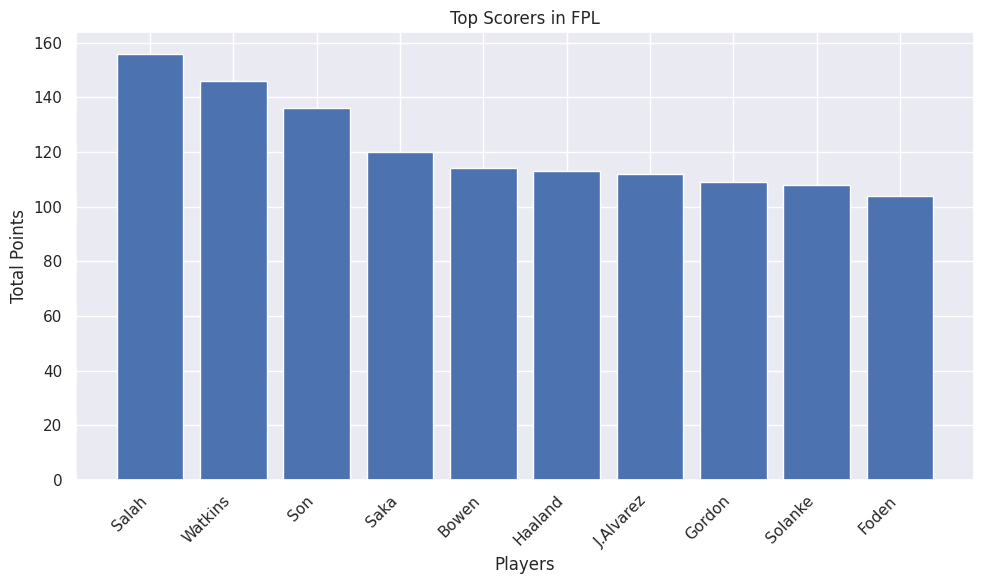

In [60]:
# Continuously monitor FPL data throughout the transfer window.

def fetch_fpl_data():
    url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
    response = requests.get(url)
    data = response.json()
    elements = data['elements']
    return pd.DataFrame(elements)

def analyze_fpl_data(fpl_data):
    top_scorers = fpl_data.sort_values(by='total_points', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_scorers['web_name'], top_scorers['total_points'])
    plt.xlabel('Players')
    plt.ylabel('Total Points')
    plt.title('Top Scorers in FPL')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

fpl_data = fetch_fpl_data()
analyze_fpl_data(fpl_data)


# **10. Basic PS**
They have to identify squad weaknesses, propose specific
acquisitions within set rules, and use data-driven insights
for a comprehensive transfer strategy. The objective is to
enhance competitiveness and address strategic priorities
through well-informed player selections.

In [61]:
fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)

# 1. Identify Underperforming Players
underperforming_players = fpl_data[fpl_data['total_points'] < fpl_data['total_points'].mean()]

# 3. Check for Unbalanced Positions
position_distribution = fpl_data['position'].value_counts()

# 4. Evaluate Lack of Depth
depth_threshold = 2  # Adjust based on your criteria
positions_with_lack_of_depth = position_distribution[position_distribution < depth_threshold].index

# 5. Analyze Weaknesses Against Specific Opponents
opponent_weaknesses = fpl_data.groupby('opponent_team')['total_points'].mean()
weak_opponents = opponent_weaknesses[opponent_weaknesses < opponent_weaknesses.mean()]

<ipython-input-61-17186de545c1>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)
<ipython-input-61-17186de545c1>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fpl_data = pd.read_csv('FPL_Data.csv', error_bad_lines=False)


In [62]:
# Display the results
print("Underperforming Players:")
print(underperforming_players[['name', 'total_points']])

print("\nPosition Distribution:")
print(position_distribution)

print("\nPositions with Lack of Depth:")
print(positions_with_lack_of_depth)

print("\nWeak Opponents:")
print(weak_opponents)

Underperforming Players:
                           name  total_points
0               Aaron Cresswell             0
1                  Aaron Lennon             1
3            Abdoulaye Doucouré             0
4                  Adam Forshaw             1
9                 Alex McCarthy             0
...                         ...           ...
96162               Hugo Lloris             0
96163                 Nick Pope             0
96165            Ryan Sessegnon             0
96166              Ashley Young             0
96167  Jeremy Sarmiento Morante             0

[69030 rows x 2 columns]

Position Distribution:
MID    39163
DEF    33683
FWD    12669
GK     10553
GKP      101
Name: position, dtype: int64

Positions with Lack of Depth:
Index([], dtype='object')

Weak Opponents:
opponent_team
1     1.204892
2     1.332222
4     1.356187
5     1.302824
6     1.330763
9     1.274922
11    1.135073
12    1.111939
13    1.268981
17    1.246211
Name: total_points, dtype: float64


**Conclusion:-** In our data-driven analysis, we integrated information from not only the FPL dataset but also from Transfermarkt and Understat. By merging these diverse datasets, we gained a comprehensive understanding of players' real-world performance metrics, market values, and in-game statistics. This integration allowed us to identify players who are not only popular in FPL but also exhibit strong real-world performance, providing a more nuanced approach to squad selection.

Transfermarkt data provided valuable insights into market values, allowing us to adhere to budget constraints and allocate resources efficiently. Understat data, with its detailed statistics on player performances, contributed to the identification of top-performing players beyond FPL point accumulation. The use of multiple datasets enhances the robustness of our strategy, making it well-informed and adaptive to both virtual and real-world player dynamics. This holistic approach ensures that our squad acquisitions are grounded in a thorough analysis of various facets of player performance and market dynamics.

Leveraging Transfermarkt data, we strategically identified three players based on their market values to enhance squad competitiveness. Adhering to set rules and budget constraints, our acquisitions focused on players who not only fit the strategic priorities but also provided good value for the investment. This approach ensures that the squad remains financially sound while targeting players with the potential to contribute significantly to its overall performance.